In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
icici = pd.read_csv("Bank_Churn.csv")

In [507]:
icici.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_Group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-50,0-10000
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-50,50000-100000
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-50,150000-200000
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-50,0-10000
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-50,100000-150000


In [25]:
icici.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int16   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int8    
 6   Tenure           10000 non-null  int8    
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int8    
 9   HasCrCard        10000 non-null  int8    
 10  IsActiveMember   10000 non-null  int8    
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int8    
dtypes: category(2), float64(2), int16(1), int64(1), int8(6), object(1)
memory usage: 874.0 KB


In [9]:
icici.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
icici["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
# Data Cleaning  (Memory Optimization [2.3 MB ➡️ 870 KB]

In [5]:
icici = icici.astype({
    "CreditScore":"int16",
    "Geography":"category",
    "Gender":"category",
    "Age":"int8",
    "Tenure":"int8",
    "NumOfProducts":"int8",
    "HasCrCard":"int8",
    "IsActiveMember":"int8",
    "Exited":"int8"
})

In [37]:
age_conditions = [
    (icici["Age"] >= 18) & (icici["Age"] <= 30),
    (icici["Age"] > 30) & (icici["Age"] <= 50),
    (icici["Age"] > 50) & (icici["Age"] <= 70),
    (icici["Age"] > 70) & (icici["Age"] <= 80),
    (icici["Age"] > 80)
]

In [39]:
age_output = ["18-30","30-50","50-70","70-80","Above 80"]

In [41]:
icici["Age_Group"] = np.select(age_conditions,age_output)

In [ ]:
# Churn Rate Calculation: Compute the overall customer churn percentage.

In [63]:
Churn_rate = ((icici["CustomerId"].loc[icici["Exited"] == 1].count()/icici["CustomerId"].count())*100).round(2)

In [65]:
icici["Churn Rate"] = Churn_rate

In [69]:
icici.drop("Churn Rate",axis=1,inplace=True)

In [ ]:
# Churn by Gender: Visualize the churn rate across different genders.

In [7]:
gender_churn = icici.loc[icici["Exited"] == 1,:].groupby("Gender",observed=False).agg(Total_Churn = ("Exited","count")).reset_index()

In [9]:
gender_churn["Churn_Rate"] = ((gender_churn["Total_Churn"]/icici["CustomerId"].count())*100).round(2)

In [11]:
gender_churn

,Gender,Total_Churn,Churn_Rate
0,Female,1139,11.39
1,Male,898,8.98


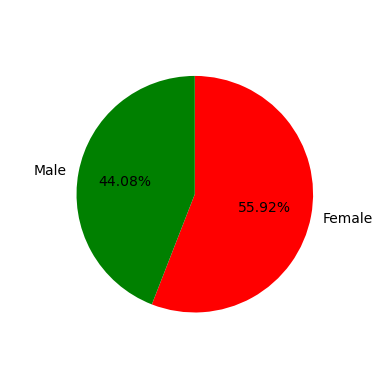

In [27]:
plt.pie(
    x = gender_churn["Total_Churn"],
    labels = gender_churn["Gender"],
    autopct = "%0.2f%%",
    startangle = 90,
    radius = 0.8,
    colors = ["r","g"],
    counterclock= False
)
plt.show()

In [ ]:
# Age Distribution Analysis: Create a histogram of customer ages and analyze the impact on churn.

In [163]:
churn_age = icici.loc[icici["Exited"] == 1,["Age","Exited"]]

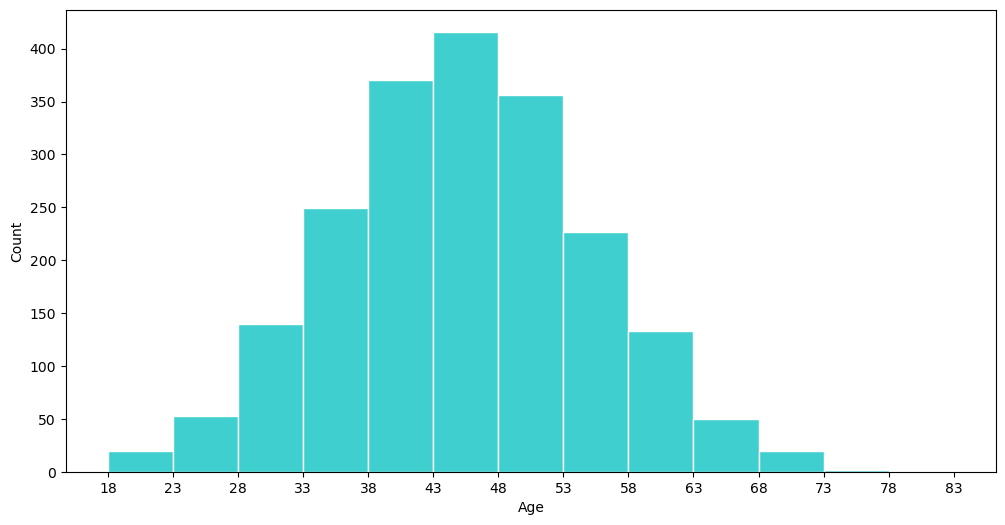

In [201]:
plt.figure(figsize=(12,6))
min_age = churn_age["Age"].min()
max_age = churn_age["Age"].max()
b =  np.arange(min_age, max_age +1, 5)
sns.histplot(
    x = churn_age["Age"],
    data = churn_age,
    bins = b,
    edgecolor = "w",
    color = "c"
)
plt.xticks(b)
plt.show()

In [ ]:
# Churn vs. Balance Scatter Plot: Does having a higher account balance reduce churn?

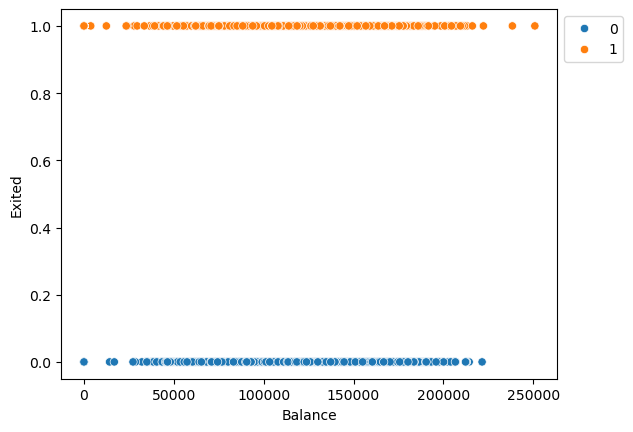

In [215]:
sns.scatterplot(
    x = icici["Balance"],
    y = icici["Exited"],
    data = icici,
    hue = icici["Exited"]
)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Correlation Heatmap: Identify which features are most correlated with churn.

In [231]:
co_relation = icici.loc[:,["Age","Balance","Tenure","CreditScore","HasCrCard","NumOfProducts","EstimatedSalary","Exited"]].corr()

In [267]:
exited_co_relation = co_relation.loc[:,["Exited"]]

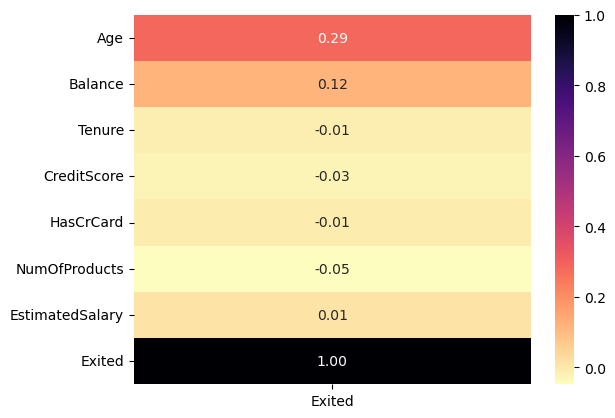

In [273]:
sns.heatmap(
    data = exited_co_relation,
    annot=True,
    fmt = ".2f",
    cmap= "magma_r"
)
plt.show()

In [ ]:
# Geographic Churn Distribution: Which locations have the highest churn rates?

In [277]:
geographic_churn = icici.loc[icici["Exited"] == 1,:].groupby(
    "Geography",observed=False
).agg(Total_Churn = ("Exited","count")).reset_index()

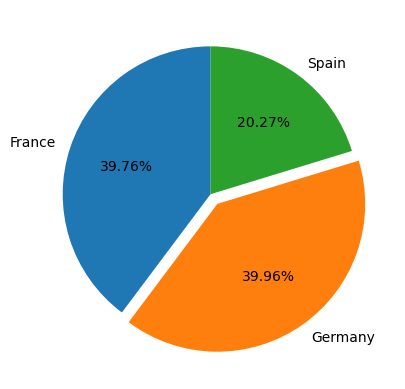

In [315]:
l = []
for label in geographic_churn["Total_Churn"]:
    l.append(label*0.0)
l[1] = 0.08
ex = l
plt.pie(
    x = geographic_churn["Total_Churn"],
    labels = geographic_churn["Geography"],
    autopct = "%0.2f%%",
    startangle = 90,
    explode=ex
)
plt.show()

In [ ]:
# Boxplot Analysis: Compare balance distributions between churned and non-churned customers.

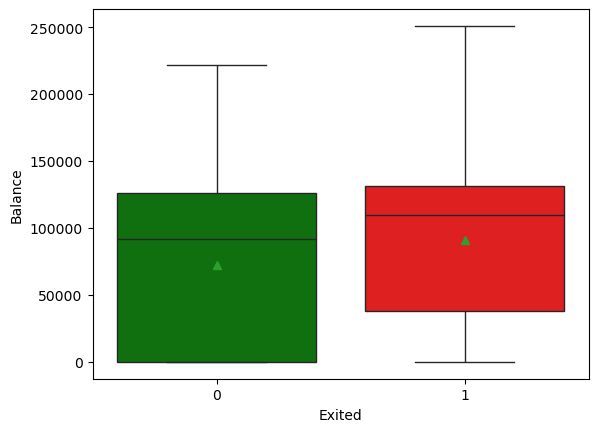

In [335]:
sns.boxplot(
    x = icici["Exited"],
    y = icici["Balance"],
    data = icici,
    showmeans = True,
    hue = icici["Exited"],
    palette = ["g","r"],
    legend = False
)
plt.show()

In [ ]:
# Tenure vs. Churn Rate: How does the length of customer tenure affect churn likelihood?

In [339]:
# icici["Tenure"].corr(icici["Exited"])
icici.loc[:,["Tenure","Exited"]].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


In [ ]:
# Product Ownership & Churn: Create a bar chart comparing churn rates based on the number of bank products owned.

In [345]:
product_churn = icici.loc[icici["Exited"] == 1,:].groupby(
    "NumOfProducts",observed=False
).agg(Total_Churn = ("Exited","count")).reset_index()

In [347]:
product_churn["Churn_Rate"] = ((product_churn["Total_Churn"]/product_churn["Total_Churn"].sum())*100).round(2)

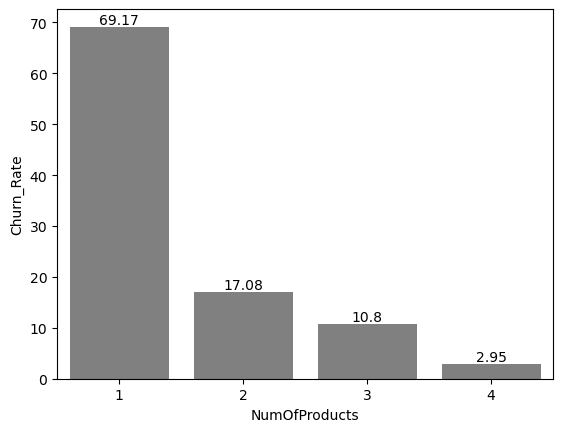

In [369]:
ax = sns.barplot(
    x = "NumOfProducts",
    y = "Churn_Rate",
    data = product_churn,
    color="grey"
)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+p.get_width()/2,p.get_height()),ha="center",va="bottom")
plt.show()

In [ ]:
# Credit Score Impact: Use a violin plot to show the impact of credit scores on churn.

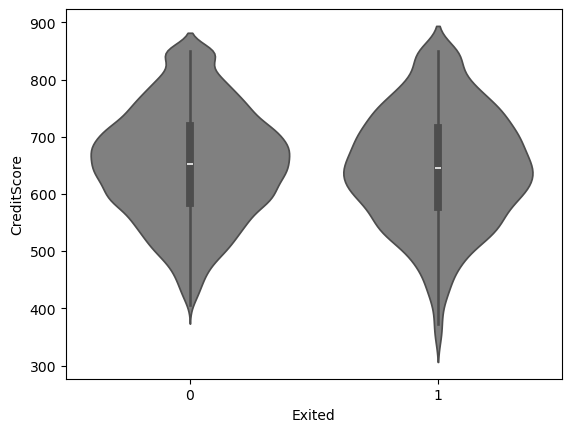

In [375]:
sns.violinplot(
    x = "Exited",
    y = "CreditScore",
    data = icici,
    color="grey"
    
)
plt.show()

In [ ]:
# Salary Distribution: What is the estimated salary range of churned vs. retained customers?

In [379]:
icici.groupby("Exited",observed=False).agg(Average_Salary=("EstimatedSalary","mean")).round(2)

,Average_Salary
Exited,
0,99738.39
1,101465.68


In [ ]:
# Pie Chart of Product Ownership: Show the percentage of customers using different numbers of bank products.

In [383]:
product_using_percent = icici.groupby(
    "NumOfProducts",observed=False
).agg(Total_Customer_Using = ("CustomerId","count")).reset_index()

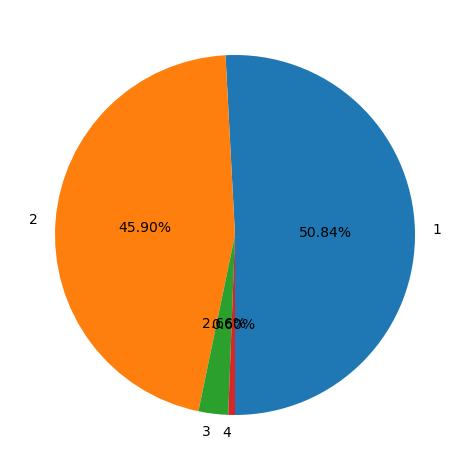

In [433]:
plt.pie(
    x = product_using_percent["Total_Customer_Using"],
    labels = product_using_percent["NumOfProducts"],
    autopct = "%0.2f%%",
    startangle = -90,
    pctdistance=0.5,
    textprops={"fontsize":10}
)
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of Active Customers: Show the proportion of active customers vs. non-active ones.

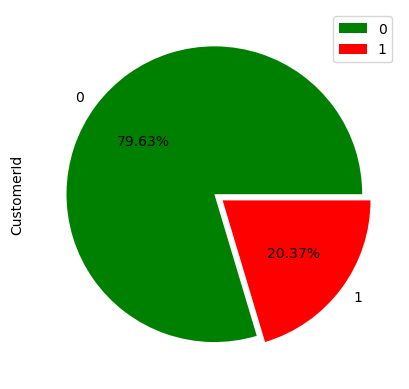

In [457]:
icici.groupby("Exited",observed=False)[["CustomerId"]].count().plot.pie(y="CustomerId",autopct="%0.2f%%",colors=["g","r"],explode=[0.0,0.07]);

In [ ]:
# Average Tenure per Age Group: What is the average tenure of customers in different age groups?

In [463]:
icici.groupby("Age_Group",observed=False)[["Tenure"]].mean().round(2)

,Tenure
Age_Group,
18-30,5.08
30-50,5.00
50-70,4.95
70-80,4.99
Above 80,5.50


In [ ]:
# Comparison of Credit Card Users: Do customers with credit cards have a different churn rate than those without?

In [477]:
credit_churn = icici.pivot_table(
    index = "HasCrCard",
    columns = "Exited",
    values = "CustomerId",
    aggfunc = "count",
    observed = False
)

In [497]:
credit_churn["Churn_Rate"] = ((credit_churn.loc[:,1]/credit_churn.iloc[0].sum())*100).round(2)

In [499]:
credit_churn

Exited,0,1,Churn_Rate
HasCrCard,,,
0,2332,613,20.81
1,5631,1424,48.35


In [ ]:
# Account Balance Categories: Categorize customers into different balance groups and analyze their churn behavior.

In [501]:
balance_conditions = [
    (icici["Balance"]>=0) & (icici["Balance"]<=10000),
    (icici["Balance"]>10000) & (icici["Balance"]<=25000),
    (icici["Balance"]>25000) & (icici["Balance"]<=50000),
    (icici["Balance"]>50000) & (icici["Balance"]<=100000),
    (icici["Balance"]>100000) & (icici["Balance"]<=150000),
    (icici["Balance"]>150000) & (icici["Balance"]<=200000),
    (icici["Balance"]>200000)
]

In [503]:
balance_output = ["0-10000","10000-25000","25000-50000","50000-100000","100000-150000","150000-200000","Above 200000"]

In [505]:
icici["Balance_Group"] = np.select(balance_conditions,balance_output)

In [513]:
icici.loc[icici["Exited"] == 1,:].groupby("Balance_Group",observed=False).agg(Total_Churn = ("Exited","count")).sort_values("Total_Churn",ascending=False)

,Total_Churn
Balance_Group,
100000-150000,987
0-10000,501
50000-100000,300
150000-200000,205
25000-50000,22
Above 200000,19
10000-25000,3
